<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Estudo%20Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso Udemy

###Calcular a taxa de retorno de um único ativo (BOVA11).

In [1]:
#Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
df_bova = wb.DataReader("BOVA11.SA", data_source= "yahoo", start="2018-01-01")

In [3]:
df_bova.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-15,77.089996,74.699997,75.199997,76.050003,11223580.0,76.050003
2020-04-16,77.230003,74.599998,76.940002,74.930000,11462550.0,74.930000
2020-04-17,76.930000,74.849998,76.459999,76.000000,7119750.0,76.000000
2020-04-20,77.239998,74.120003,74.160004,75.940002,8754410.0,75.940002
2020-04-22,78.250000,75.989998,76.000000,77.699997,11503000.0,77.699997


In [4]:
#Calcular a taxa de retorno simples  - Geralmente é mais utilizado para comparar ativos diferentes.
df_bova["retorno_simples"] = (df_bova["Adj Close"]/df_bova["Adj Close"].shift(1)) -1
#Transformando a série de dados em um DataFrame
pd.DataFrame(df_bova["retorno_simples"])

,retorno_simples
Date,
2018-01-02,NaN
2018-01-03,0.002663
2018-01-04,0.009296
2018-01-05,0.005790
2018-01-08,0.004186
...,...
2020-04-15,-0.010410
2020-04-16,-0.014727
2020-04-17,0.014280


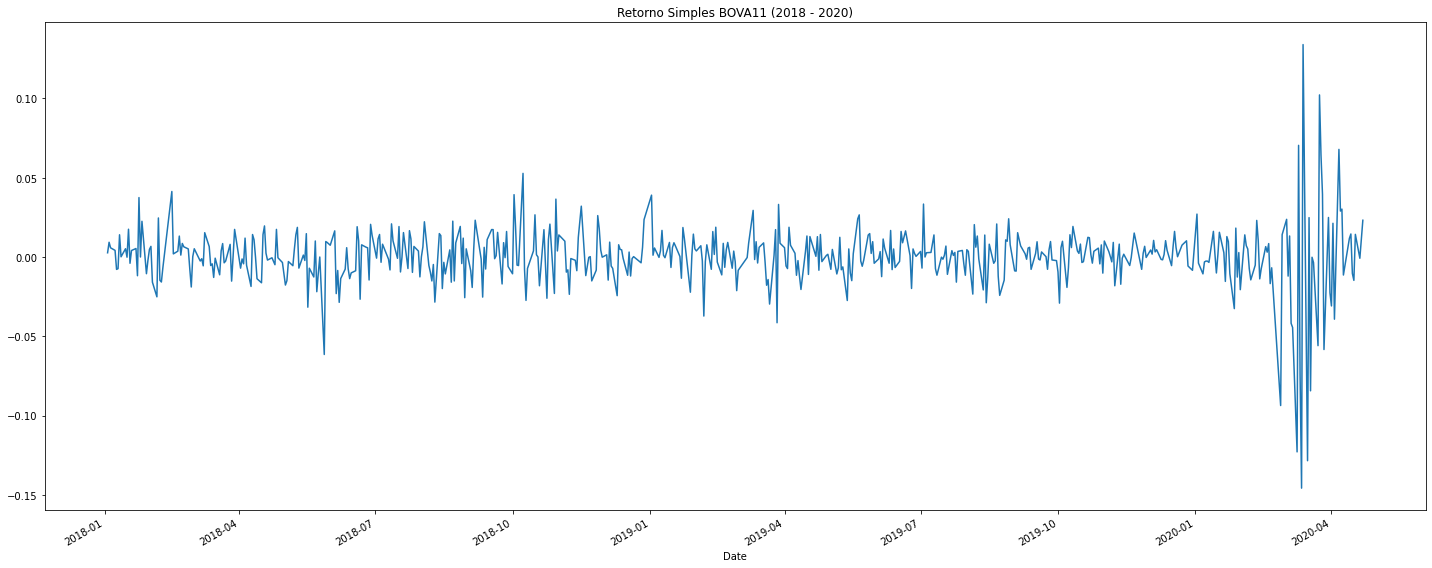

In [5]:
#Plotar em um gráfico.
fig, ax = plt.subplots()
df_bova["retorno_simples"].plot(figsize = (20,8))
ax.set_title("Retorno Simples BOVA11 (2018 - 2020)")
plt.tight_layout();

In [6]:
#Calcular a taxa média de retorno diária .mean().
taxa_retorno_diaria = df_bova["retorno_simples"].mean()
print("Taxa Média de Retorno Diário:", taxa_retorno_diaria*100,"%")


Taxa Média de Retorno Diário: 0.026360779107427523 %


In [7]:
#Calcular a taxa média de retorno anual.
taxa_retorno_anual = df_bova["retorno_simples"].mean()*250
taxa_retorno_anual

0.06590194776856881

In [8]:
#arredondar o valor e transformar em uma string.
print(str(round(taxa_retorno_anual, 5) * 100),"%")

6.59 %


In [9]:
#Calcular a taxa de Retorno Logarítimico - Geralmente é utilizado com um único ativo.
df_bova.head()

,High,Low,Open,Close,Volume,Adj Close,retorno_simples
Date,,,,,,,
2018-01-02,75.230003,74.000000,74.000000,75.099998,2292470.0,75.099998,NaN
2018-01-03,75.769997,74.900002,75.000000,75.300003,3765200.0,75.300003,0.002663
2018-01-04,76.440002,75.510002,75.540001,76.000000,2245750.0,76.000000,0.009296
2018-01-05,76.440002,75.559998,76.000000,76.440002,2288790.0,76.440002,0.005790
2018-01-08,76.760002,75.930000,76.330002,76.760002,2544400.0,76.760002,0.004186


In [10]:
df_bova["retorno_logaritmico"] = np.log(df_bova["Adj Close"]/df_bova["Adj Close"].shift(1))
df_bova["retorno_logaritmico"]

Date
2018-01-02         NaN
2018-01-03    0.002660
2018-01-04    0.009253
2018-01-05    0.005773
2018-01-08    0.004178
                ...   
2020-04-15   -0.010464
2020-04-16   -0.014837
2020-04-17    0.014179
2020-04-20   -0.000790
2020-04-22    0.022912
Name: retorno_logaritmico, Length: 567, dtype: float64

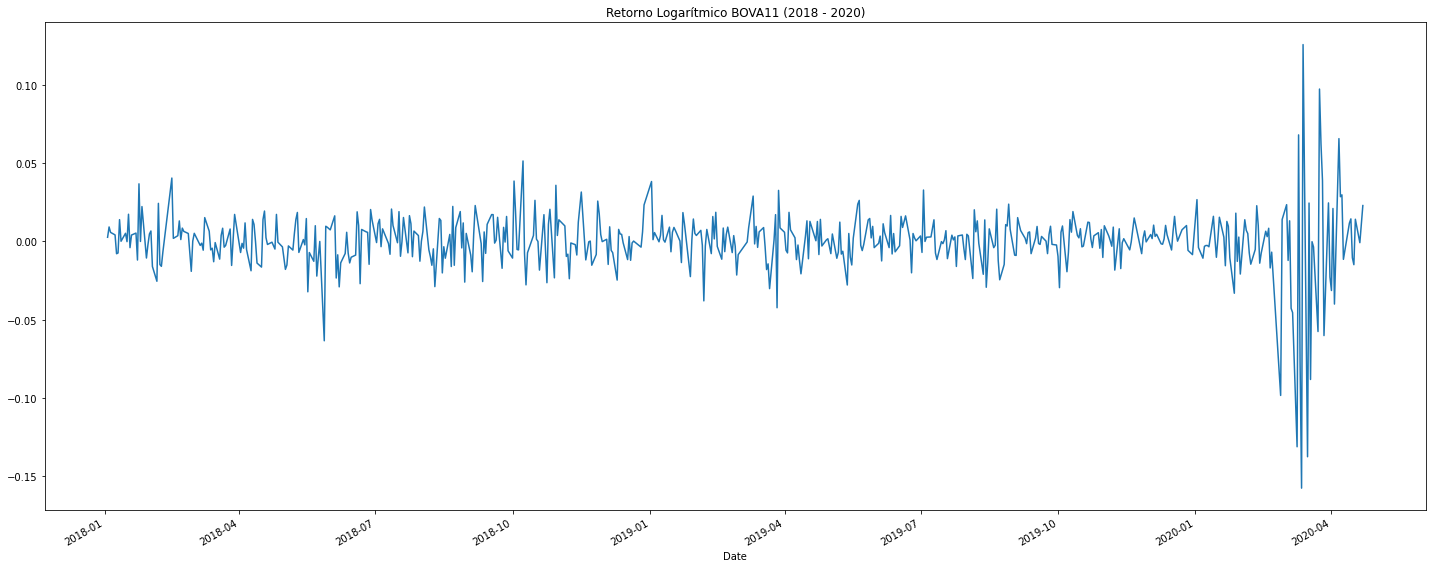

In [11]:
fig, ax = plt.subplots()
df_bova["retorno_logaritmico"].plot(figsize = (20,8))
ax.set_title("Retorno Logarítmico BOVA11 (2018 - 2020)")
plt.tight_layout();

In [12]:
#Calcular a taxa média de retorno diária .mean().
taxa_retorno_logaritmico_diaria = df_bova["retorno_logaritmico"].mean()
print("Taxa Média de Retorno Logarítmico Diário:", taxa_retorno_logaritmico_diaria * 100,"%")

Taxa Média de Retorno Logarítmico Diário: 0.006013194283624219 %


In [13]:
taxa_retorno_logaritmico_anual = df_bova["retorno_logaritmico"].mean() * 250
taxa_retorno_logaritmico_anual

0.015032985709060547

In [14]:
print(str(round(taxa_retorno_logaritmico_anual,5)*100),"%")

1.503 %


###Calcular a taxa de retonode um portifólio.

In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
carteira = ["ALPA4.SA",
            "AMAR3.SA",
            "AZUL4.SA",
            "B3SA3.SA",
            "BBAS3.SA",
            "BIDI4.SA",
            "BRML3.SA",
            "CEAB3.SA",
            "COGN3.SA",
            "EGIE3.SA",
            "ELET6.SA",
            "FLRY3.SA",
            "GNDI3.SA",
            "HAPV3.SA",
            "IGTA3.SA",
            "IRBR3.SA",
            "JBSS3.SA",
            "LAME4.SA",
            "LCAM3.SA",
            "MGLU3.SA",
            "MILS3.SA",
            "MOVI3.SA",
            "MRFG3.SA",
            "NTCO3.SA",
            "OIBR4.SA",
            "PETR3.SA",
            "RAPT4.SA",
            "SAPR11.SA",
            "SBSP3.SA",
            "SLCE3.SA",
            "SULA11.SA",
            "TUPY3.SA",
            "UGPA3.SA",
            "VALE3.SA",
            "VVAR3.SA",
            "WEGE3.SA",
            "WIZS3.SA"]
df_carteira = pd.DataFrame()
for acoes in carteira:
  df_carteira[acoes] = wb.DataReader(acoes, data_source = "yahoo", start = "2020-1-1")["Adj Close"]

In [0]:
#Tratar valores faltantes.
#Saber quais colunas possuem valores faltantes, quantos valores faltantes e analisar o que utilizar para substituí-los

In [17]:
df_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2020-01-02 to 2020-04-22
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALPA4.SA   75 non-null     float64
 1   AMAR3.SA   75 non-null     float64
 2   AZUL4.SA   75 non-null     float64
 3   B3SA3.SA   75 non-null     float64
 4   BBAS3.SA   75 non-null     float64
 5   BIDI4.SA   75 non-null     float64
 6   BRML3.SA   75 non-null     float64
 7   CEAB3.SA   75 non-null     float64
 8   COGN3.SA   75 non-null     float64
 9   EGIE3.SA   75 non-null     float64
 10  ELET6.SA   75 non-null     float64
 11  FLRY3.SA   75 non-null     float64
 12  GNDI3.SA   75 non-null     float64
 13  HAPV3.SA   75 non-null     float64
 14  IGTA3.SA   75 non-null     float64
 15  IRBR3.SA   75 non-null     float64
 16  JBSS3.SA   75 non-null     float64
 17  LAME4.SA   75 non-null     float64
 18  LCAM3.SA   75 non-null     float64
 19  MGLU3.SA   75 non-null     float

In [18]:
df_carteira.describe()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,48.000000,75.000000,75.000000,48.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,30.367865,10.427600,40.455733,43.343174,40.843641,13.620298,14.826667,13.008800,8.863733,47.160133,33.928133,26.995144,60.339088,53.779028,45.140329,25.801093,24.010400,24.252230,18.785447,47.810697,7.675733,16.302213,10.414800,38.948933,1.212133,24.283867,10.776800,101.250625,53.014400,22.310667,59.501443,20.171067,19.648258,47.574133,10.798400,38.662317,11.957545
std,5.056418,4.151596,19.861329,5.646447,10.023729,3.706751,4.175077,4.355872,3.247844,5.719395,7.175911,4.827478,12.309153,9.118176,11.016352,14.474383,3.825074,3.982558,5.939472,8.342204,2.433401,5.385657,1.758197,9.253025,0.205112,8.028471,3.806094,11.870735,11.063782,1.958286,6.386937,5.963908,5.669402,6.253951,4.164346,5.161274,2.555050
min,17.600000,3.750000,10.350000,30.205217,22.129999,6.884902,7.900000,5.300000,3.660000,37.560001,18.480000,18.139999,33.384838,31.719999,26.969999,6.875677,16.750000,16.170000,8.199930,28.686602,3.360000,7.710000,6.440000,21.250000,0.850000,11.050000,4.850000,25.709999,30.549999,18.400000,41.200001,10.490000,10.690000,34.099998,4.100000,26.445274,6.944983
25%,25.945000,5.545000,16.590000,39.160000,29.650000,9.739387,9.970000,8.550000,5.085000,40.815001,27.645000,21.594999,49.530777,46.900000,31.820000,10.112157,20.840000,20.935000,12.695000,41.446712,5.080000,9.940000,9.065000,28.990000,1.005000,16.260000,6.735000,99.450001,41.484999,20.675000,59.016651,13.380000,14.075000,42.900002,6.205000,34.789772,9.295000
50%,32.529774,13.370000,45.189999,44.291065,46.913639,15.316411,16.980000,15.650000,10.490000,49.369999,36.450001,30.290081,63.819851,55.419998,52.001602,32.217457,23.700001,26.200001,21.391125,50.074600,9.000000,19.090000,10.750000,41.250000,1.270000,28.219999,12.100000,102.605000,58.750000,22.420000,61.500019,22.200001,19.980000,48.570000,11.700000,38.732746,13.113226
75%,34.581600,13.710000,59.035000,48.303545,49.133179,16.863018,18.505000,16.700000,11.695000,52.174999,40.254999,30.792322,71.169498,61.324999,54.566813,40.428982,27.344999,27.440001,23.916466,55.575933,9.800000,20.990000,11.740000,47.525002,1.380000,31.600000,14.255000,104.607502,62.025000,23.790000,63.637852,25.900000,24.963175,53.174999,14.470000,41.850113,14.301184
max,37.911461,15.280000,62.410000,52.702896,53.052986,19.108095,19.219999,18.100000,12.790000,54.099998,42.660000,32.830769,76.067604,69.090309,56.863056,44.102558,30.090000,29.059999,25.451477,58.597931,10.850000,22.490000,13.990000,50.889999,1.570000,33.029999,14.920000,111.099998,66.470001,25.990000,66.640762,26.770000,27.461466,57.360001,16.639999,49.585880,14.913439


In [19]:
ultima_cotacao = df_carteira.iloc[-1].round(2)
ultima_cotacao = pd.DataFrame(ultima_cotacao.round(2))
ultima_cotacao

,2020-04-22
ALPA4.SA,27.52
AMAR3.SA,6.40
AZUL4.SA,16.31
B3SA3.SA,42.01
BBAS3.SA,28.86
BIDI4.SA,9.55
BRML3.SA,10.47
CEAB3.SA,9.80
COGN3.SA,5.08
EGIE3.SA,41.03


In [20]:
#Normalizar para a base 100.
df_carteira.iloc[0]

ALPA4.SA      32.529774
AMAR3.SA      13.460000
AZUL4.SA      58.799999
B3SA3.SA      44.747368
BBAS3.SA      53.052986
BIDI4.SA      15.665645
BRML3.SA      18.219999
CEAB3.SA      18.100000
COGN3.SA      12.200000
EGIE3.SA      52.000000
ELET6.SA      38.709999
FLRY3.SA      30.290081
GNDI3.SA      71.413658
HAPV3.SA      66.286797
IGTA3.SA      54.292858
IRBR3.SA      39.181538
JBSS3.SA      27.200001
LAME4.SA      26.785116
LCAM3.SA      22.965748
MGLU3.SA      49.118713
MILS3.SA      10.120000
MOVI3.SA      19.449736
MRFG3.SA      10.060000
NTCO3.SA      38.330002
OIBR4.SA       1.240000
PETR3.SA      32.799999
RAPT4.SA      14.300000
SAPR11.SA    100.610001
SBSP3.SA      60.549999
SLCE3.SA      25.990000
SULA11.SA     61.370754
TUPY3.SA      25.350000
UGPA3.SA      25.279165
VALE3.SA      54.330002
VVAR3.SA      11.730000
WEGE3.SA      35.088482
WIZS3.SA      13.113226
Name: 2020-01-02 00:00:00, dtype: float64

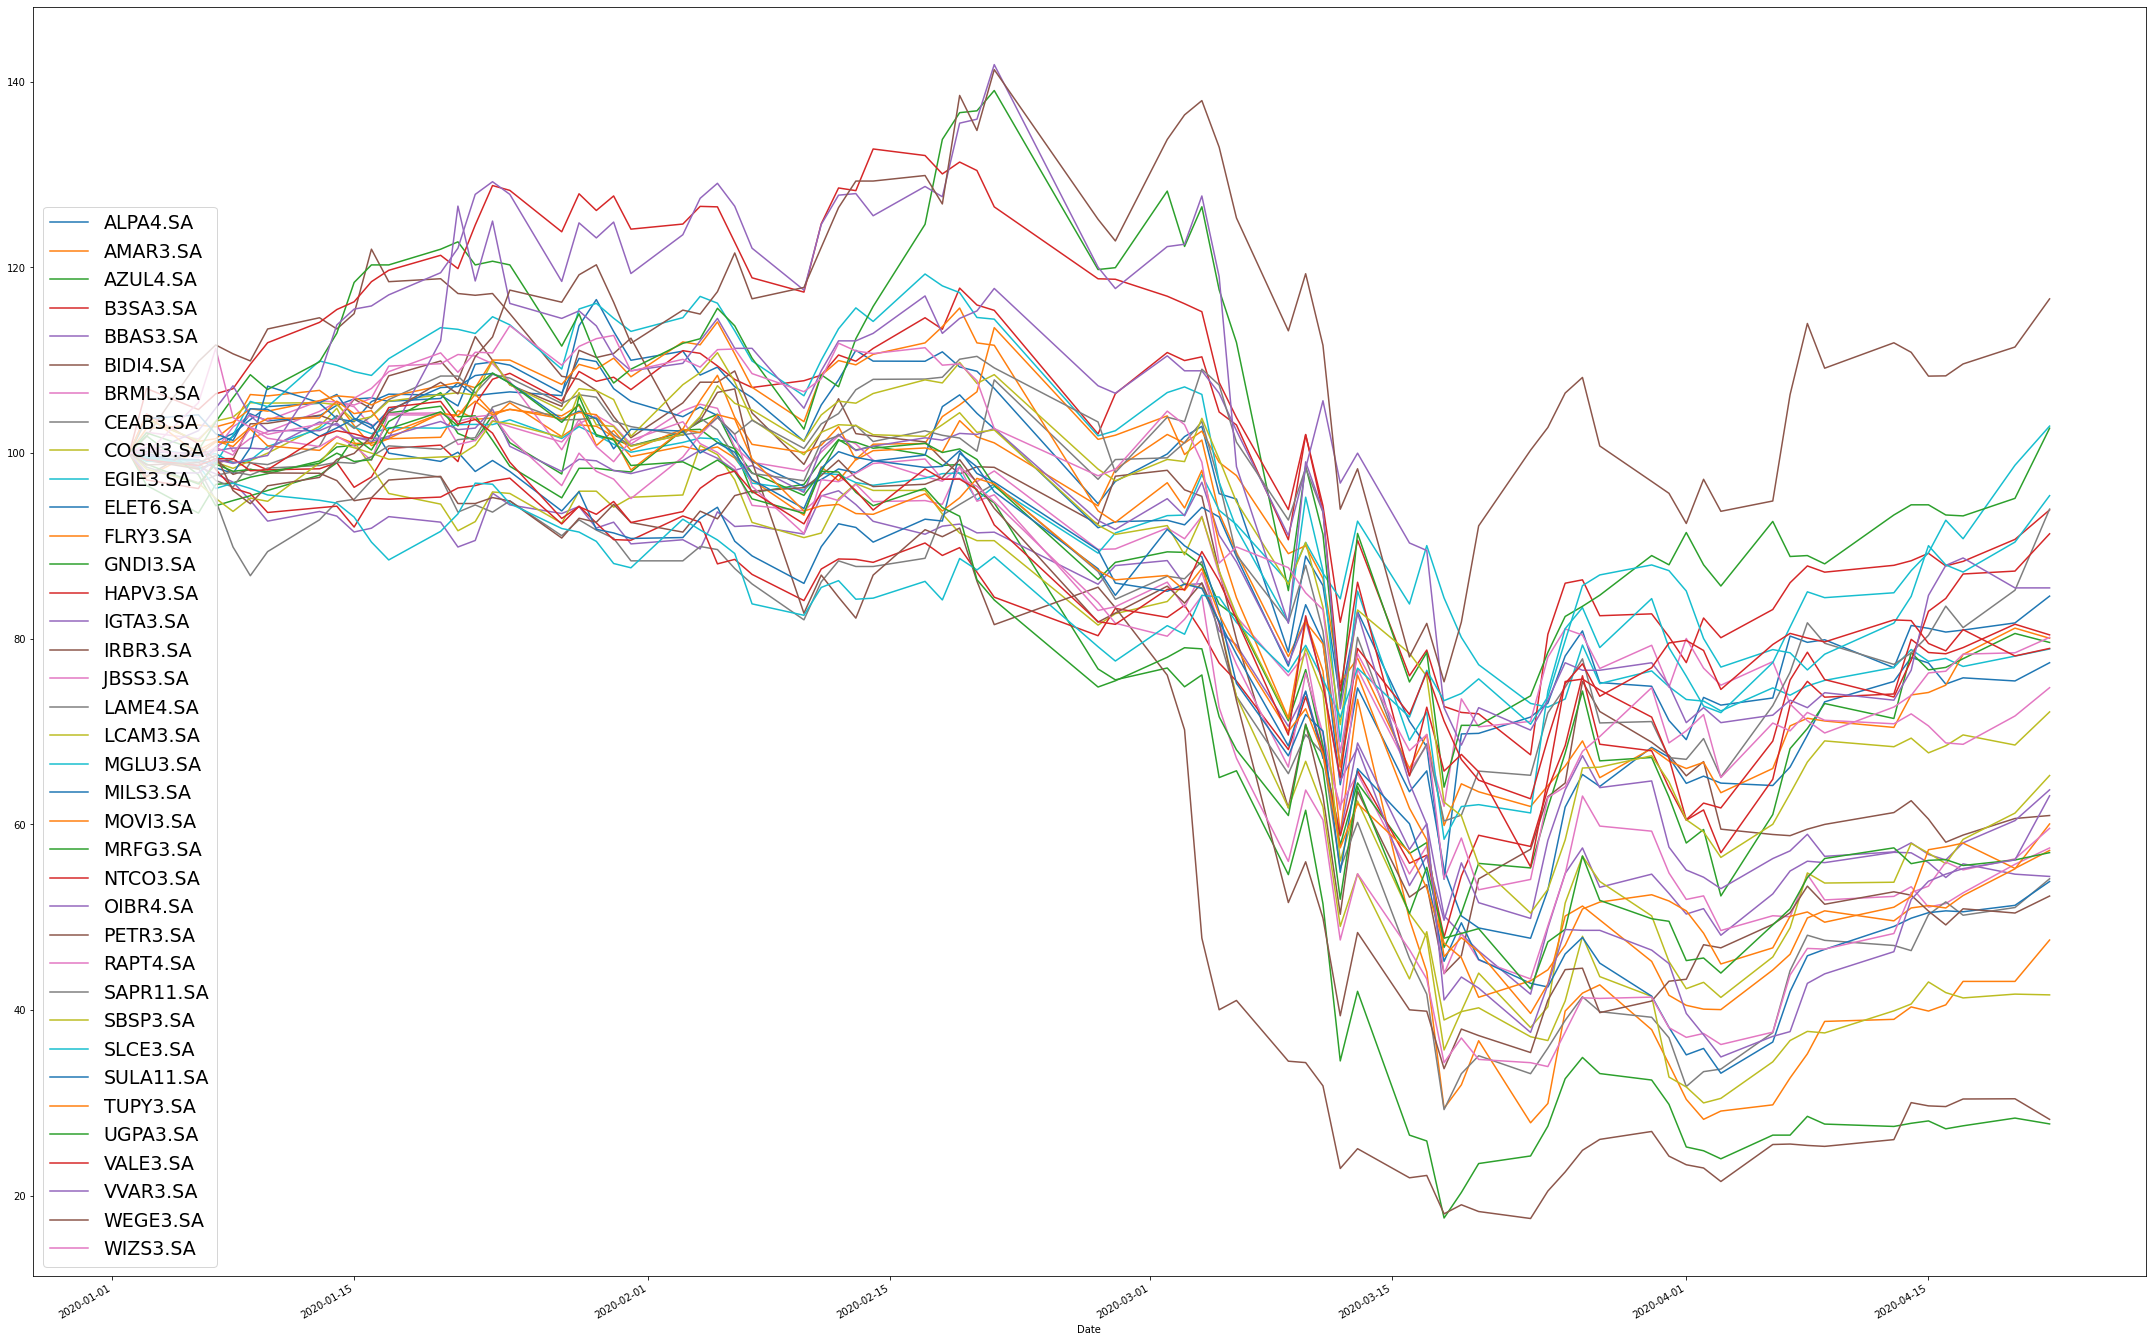

In [21]:
#Criar um gráfico de linhas para analisa io comportamento dos ativos no período.
(df_carteira/df_carteira.iloc[0]*100).plot(figsize = (30,20), title= "")
plt.legend(fontsize=19, loc = "lower left")
plt.tight_layout();

In [22]:
retorno_carteira = (df_carteira/df_carteira.shift(1)) - 1
retorno_carteira.head(75)

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000000,0.036404,-0.034694,-0.028818,-0.001673,0.017834,0.022503,-0.005525,-0.004098,0.005769,-0.004133,-0.025803,0.018699,0.042294,0.001468,-0.007771,0.009926,0.001866,0.036223,-0.008920,-0.005929,0.026558,0.021869,0.069658,0.000000,-0.024695,0.006294,-0.015108,-0.017176,-0.004232,0.037103,0.041026,-0.011719,-0.007362,-0.021313,-0.012770,0.000000
2020-01-06,-0.015654,-0.022939,-0.031008,-0.009587,-0.013219,0.079474,-0.006978,-0.010556,-0.013169,-0.008413,0.001556,0.029558,-0.041233,-0.030834,-0.001649,-0.009348,-0.023662,-0.011546,-0.022056,0.000818,-0.000994,0.003692,-0.018482,-0.021219,0.024194,0.032510,-0.011119,-0.016954,-0.015292,-0.008887,0.004062,-0.040546,-0.021739,-0.005934,0.000000,0.002587,0.054355
2020-01-07,0.022763,0.002935,0.033091,0.032266,-0.007547,0.016232,0.016216,-0.035373,0.007506,0.002121,0.015281,0.010323,-0.034148,-0.027479,0.002936,0.006631,0.017897,-0.019970,0.020851,-0.002861,-0.008955,-0.001996,0.030723,0.016197,0.023622,-0.013624,0.011244,0.008110,-0.017065,-0.025341,-0.019605,0.013033,0.022222,0.007275,0.014808,0.007741,0.055519
2020-01-08,0.010976,0.014631,0.001760,-0.002679,-0.009125,-0.008557,-0.029255,-0.052969,-0.006623,-0.010006,0.008418,-0.006066,0.005917,-0.020577,0.002745,0.003800,0.024542,-0.007305,0.004168,0.030744,-0.006024,0.005000,0.025000,0.005150,0.023077,-0.016268,-0.008339,0.003971,-0.014757,0.006000,-0.007142,0.000000,-0.007905,0.000185,-0.004292,-0.037838,-0.067001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15,-0.003775,-0.011050,0.009174,0.009100,-0.018537,-0.031633,-0.041195,0.083333,0.058468,-0.016098,-0.007618,0.003571,-0.023720,-0.017739,-0.021587,-0.011686,0.032836,0.024263,-0.018032,0.022144,0.011881,0.005040,0.000000,0.067831,0.105263,-0.032596,0.013280,NaN,-0.022879,0.064604,NaN,0.096677,0.006383,-0.030092,0.037767,-0.023136,-0.018028
2020-04-16,-0.004926,0.016760,-0.030303,-0.015280,-0.028668,-0.041096,0.007519,0.027473,-0.026667,0.003966,-0.029372,0.010676,0.003471,-0.001729,-0.010383,-0.002534,0.002408,0.039015,-0.019893,0.039225,0.003914,-0.005015,-0.011579,0.016667,0.038095,-0.029483,0.048493,NaN,0.011219,-0.023077,NaN,0.005510,0.001409,-0.009956,0.014240,0.000263,-0.025918
2020-04-17,0.002666,0.062271,0.011875,0.005596,0.027083,0.013187,0.022388,-0.027808,-0.013699,-0.011111,0.008941,0.044014,0.012197,0.008468,0.032787,0.027564,0.024027,-0.027716,0.046838,-0.021505,-0.001949,0.026210,-0.001065,0.031240,0.009174,0.035338,-0.015000,NaN,0.017125,-0.008749,NaN,0.006849,-0.011260,0.028999,0.010920,0.011839,-0.002217


In [0]:
#Transformar os pesos em uma matrix
pesos = np.array([
2.95,
0.69,
2.62,
4.50,
3.09,
2.56,
1.12,
1.58,
2.72,
6.60,
1.61,
2.60,
3.05,
2.86,
1.85,
5.93,
2.34,
4.05,
1.61,
5.42,
2.63,
1.25,
4.43,
1.88,
0.85,
2.76,
1.37,
4.13,
2.34,
3.99,
2.55,
0.78,
0.77,
4.60,
0.00,
4.39,
1.58])

In [24]:
#Multiplicar as matrizes
np.dot(retorno_carteira, pesos)

array([         nan,   0.08415966,  -0.59993108,   0.37179906,
        -0.24528057,   0.91419179,   0.20719041,   1.32911458,
         0.75000256,  -0.26923385,   0.20512361,   1.14925233,
         1.13012051,  -0.56388018,   0.93346174,   0.89403452,
        -0.65167557,  -3.21818084,   2.65763383,  -1.03587475,
        -0.97802874,  -1.06162513,   1.16206351,   0.76225111,
         0.57575906,  -1.28763172,  -2.71896747,  -3.12611327,
         3.32115831,   1.38001511,  -0.10016352,   0.19525659,
         1.6750639 ,  -0.16434317,   1.58939202,  -1.79977129,
        -0.32891046,  -9.023091  ,   0.20030189,   2.4689051 ,
        -1.02072484,  -0.19504814,  -6.25975673,  -3.99622711,
       -12.75956867,   8.62313671,  -7.03849964,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [25]:
#Respectivo retorno anual de cada ativo
retorno_carteira_anual = retorno_carteira.mean()*76 # *250
retorno_carteira_anual

ALPA4.SA    -0.014675
AMAR3.SA    -0.377609
AZUL4.SA    -0.897288
B3SA3.SA     0.035564
BBAS3.SA    -0.503285
BIDI4.SA    -0.293063
BRML3.SA    -0.431664
CEAB3.SA    -0.406011
COGN3.SA    -0.696483
EGIE3.SA    -0.205003
ELET6.SA    -0.137417
FLRY3.SA    -0.158813
GNDI3.SA    -0.076425
HAPV3.SA    -0.094343
IGTA3.SA    -0.337556
IRBR3.SA    -1.002043
JBSS3.SA    -0.089715
LAME4.SA     0.071724
LCAM3.SA    -0.198275
MGLU3.SA     0.216399
MILS3.SA    -0.473739
MOVI3.SA    -0.338346
MRFG3.SA     0.230389
NTCO3.SA     0.087523
OIBR4.SA    -0.066777
PETR3.SA    -0.451678
RAPT4.SA    -0.347947
SAPR11.SA   -0.079193
SBSP3.SA    -0.227132
SLCE3.SA     0.006772
SULA11.SA   -0.608612
TUPY3.SA    -0.490209
UGPA3.SA    -0.389222
VALE3.SA    -0.128467
VVAR3.SA    -0.171224
WEGE3.SA     0.276317
WIZS3.SA    -0.161660
dtype: float64

In [26]:
#Multiploicar o retorno anual pelo pesos achamos o retono anual da carteira
np.dot(retorno_carteira_anual, pesos)

-20.904641702370164

In [0]:
#Comparar o retorno anual da minha carteira com o de outra.
#pesos_2 = np.array([0.25, 0.4, 0.35])

#pfolio_1 = str(round(np.dot(retorno_carteira_anual, pesos), 5)*100)+"%"
#pfolio_2 = str(round(np.dot(retorno_carteira_anual, pesos_2), 5)*100)+"%"

#print(pfolio_1)
#print(pfolio_2)

In [0]:
#Comparaçao indices e minha carteira.
indices = ["BOVA11.SA"]
df_indices = pd.DataFrame()
for t in indices:
   df_indices[t] = wb.DataReader(t, data_source = "yahoo", start = '2020-01-01')['Adj Close']

In [29]:
df_indices.head()

,BOVA11.SA
Date,
2020-01-02,114.239998
2020-01-03,113.800003
2020-01-06,112.589996
2020-01-07,112.239998
2020-01-08,111.949997


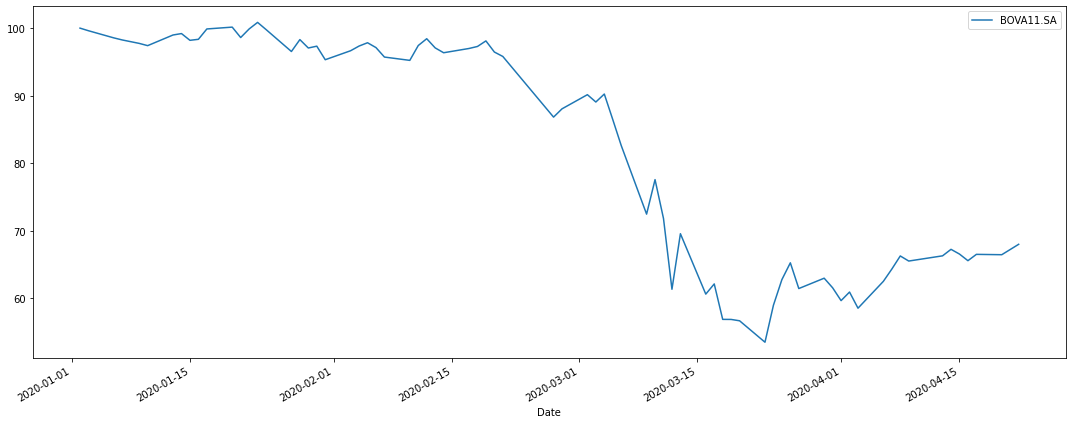

In [30]:
(df_indices/df_indices.iloc[0]*100).plot(figsize=(15,6))
plt.tight_layout();

In [31]:
#Calcular os retornos simples dos índices.
df_indices_retorno = (df_indices/df_indices.shift(1)) -1
df_indices_retorno.head()

,BOVA11.SA
Date,
2020-01-02,NaN
2020-01-03,-0.003851
2020-01-06,-0.010633
2020-01-07,-0.003109
2020-01-08,-0.002584


In [32]:
#Aparentemente o IBOV superou o SP 500
df_indices_retorno_anual = df_indices_retorno.mean()*75
df_indices_retorno_anual

BOVA11.SA   -0.316339
dtype: float64

#Como medir o risco de um ativo.



In [0]:
tickers = ["PETR4.SA", "VALE3.SA"]
sec_data = pd.DataFrame()
for t in tickers :
  sec_data[t] = wb.DataReader(t, data_source = "yahoo", start = "1990-01-01")["Adj Close"]


In [34]:
sec_data.head(3)

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,4.050402,2.266039
2000-01-04,3.826338,2.212088
2000-01-05,3.787730,2.212088


In [0]:
sec_returns = np.log(sec_data/sec_data.shift(1))

In [36]:
sec_returns

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.056908,-0.024096
2000-01-05,-0.010141,0.000000
2000-01-06,-0.003464,0.000000
2000-01-07,0.004556,0.035932
...,...,...
2020-04-15,-0.021142,-0.030554
2020-04-16,-0.041127,-0.010006
2020-04-17,0.025747,0.028587


In [37]:
sec_returns['PETR4.SA'].mean()*250

0.07109285857081026

In [38]:
#Lembrar de tirar a raiz quadrada de 250, pois o std é a raiz da variância.
sec_returns['PETR4.SA'].std()*250**0.5

0.43359971141256437

In [39]:
#Para compara as duas em empresas basta verificar a que tem menor desvio padrao com o maior retorno
#basta fazer o mesmo método para vale.

#temos que utilizar dois colchetes pois representa um array com duas dimensões.
sec_returns[["PETR4.SA", "VALE3.SA"]].mean()*250

PETR4.SA    0.071093
VALE3.SA    0.147288
dtype: float64

In [40]:
sec_returns[["PETR4.SA", "VALE3.SA"]].std()*250**0.5

PETR4.SA    0.433600
VALE3.SA    0.421777
dtype: float64

#Relação entre ativos financeiros

In [41]:
#Como quantificar o retorno de dois ativos.
petr_var = sec_returns['PETR4.SA'].var()*250
petr_var

0.18800870973705908

In [42]:
vale_var = sec_returns['VALE3.SA'].var()*250
vale_var

0.177896075183091

In [43]:
#Calculo da Covariancia
#Observar que a Covariancoa entre petr e petr é a propria variacia de petr
cov_matrix = sec_returns.cov()*250 #anual
cov_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,0.188009,0.091732
VALE3.SA,0.091732,0.177896


In [44]:
#Calculo da 
#Essa é a correlação dos retornos e nao dos precos.
#Nao anulaizar pois nao nos traz retornos medios diarios apenas  a correlcao entre retornos.
#O que importa para um investidor é o retorno e nao o preco, por isso o cálculo foi realizado em cima do retorno.
corr_matrix = sec_returns.corr()
corr_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,1.000000,0.501528
VALE3.SA,0.501528,1.000000


#Calculando o Risco de um Portifólio

In [0]:
pesos =np.array([0.5, 0.5])

In [46]:
#Variancia de um portifolio
pfolio_var = np.dot(pesos.T, np.dot(sec_returns.cov()*250, pesos))
print (str(round(pfolio_var, 5)*100)+"%")

13.733999999999998%


In [47]:
#calculo da volatilidade do portifolio é a raiz quadrada da variancia
pfolio_vol = np.dot(pesos.T, np.dot(sec_returns.cov()*250, pesos))**0.5
pfolio_vol

0.37059704834834556

In [48]:
print (str(round(pfolio_vol, 5)*100)+"%")

37.059999999999995%


#Cálculo do Rsico Diversificável e não diversificável.

O risco de um  carteira pod ser descrito com a soma de dois componetes: a variancoa dos ativos na carteira e o produtos entre o produto da covariancia entre as acoes e seus desvio padrao.





*   Risco não diversificáve 
Este componente depende da Variancia de cada ativo, também conhecido como *Risco Sistemático*.


*   Risco Diversificável

Tambvém conhecido como Risco Idiossincrático é o risco específico de uma empresa.Impulsinado por eventods específicos da emopresa.







In [49]:
#Risco Diversificável de um Portifólio = Variância do Portifólio - Variância Anual Ponderada de cada ação.
#cada par de colchetes adicional ao redor da colua adicioan uma dimensao a matrix numpy



weights = np.array([0.5,0.5])

#Risco diversificável.

petr4_var_a = sec_returns[["PETR4.SA"]].var()*250

vale3_var_a = sec_returns[["VALE3.SA"]].var()*250

diversifiable_risk = pfolio_var - (weights[0]**2*petr4_var_a) - (weights[1]**2**vale3_var_a)
diversifiable_risk


##Aos invés de um número decimal obteremos um vetor sem número, por isso deve-se ter cuidado ao criar vetores numpy.





PETR4.SA   NaN
VALE3.SA   NaN
dtype: float64

In [50]:
#Técnicas para resolver esse problema. Como a varinacia da petr4 é armazenada em uma matrix 1X1, 
#esse irá ser um valor único. Então pode-se tranformar esse valor em um decimal.

float(petr4_var_a)


0.18800870973705908

In [51]:
#Pode-se utilizar colchetes simples quando indicar que irá utilizar os dados da coluna petr4.
petr4_var_a = sec_returns["PETR4.SA"].var()*250
petr4_var_a

0.18800870973705908

In [52]:
#Aplicar o mesmo método pra VALE3
vale3_var_a = sec_returns["VALE3.SA"].var()*250
vale3_var_a

0.177896075183091

In [53]:
#Então o diversifiabvle Risk will be.

diversifiable_risk = pfolio_var - (weights[0]**2*petr4_var_a) - (weights[1]**2*vale3_var_a)
diversifiable_risk

0.045865976014468464

In [54]:
print(str(round(diversifiable_risk*100, 2))+"%")

4.59%


In [55]:
#Verificando o risco não diversificável
n_dr_1 = pfolio_var - diversifiable_risk
print(str(round(n_dr_1*100, 2))+"%")

9.15%


In [56]:
n_dr_2 = (weights[0]**2*petr4_var_a) + (weights[1]**2*vale3_var_a)
n_dr_2

0.09147619623003753

In [57]:
n_dr_1 == n_dr_2

True

#Obtendo a Fronteira Eficiente de um grupo de portifólios Composto por dois ativos.


In [58]:
df_carteira

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,32.529774,13.46,58.799999,44.747368,53.052986,15.665645,18.219999,18.100000,12.20,52.000000,38.709999,30.290081,71.413658,66.286797,54.292858,39.181538,27.200001,26.785116,22.965748,49.118713,10.12,19.449736,10.06,38.330002,1.24,32.799999,14.30,100.610001,60.549999,25.990000,61.370754,25.350000,25.279165,54.330002,11.73,35.088482,13.113226
2020-01-03,32.529774,13.95,56.759998,43.457817,52.964233,15.945032,18.629999,18.000000,12.15,52.299999,38.549999,29.508492,72.749046,69.090309,54.372559,38.877045,27.469999,26.835089,23.797626,48.680595,10.06,19.966278,10.28,41.000000,1.24,31.990000,14.39,99.089996,59.509998,25.879999,63.647797,26.389999,24.982924,53.930000,11.48,34.640415,13.113226
2020-01-06,32.020557,13.63,55.000000,43.041191,52.264091,17.212254,18.500000,17.809999,11.99,51.860001,38.610001,30.380713,69.749390,66.959999,54.282898,38.513615,26.820000,26.525263,23.272751,48.720425,10.05,20.040001,10.09,40.130001,1.27,33.029999,14.23,97.410004,58.599998,25.650000,63.906319,25.320000,24.439817,53.610001,11.48,34.730030,13.826000
2020-01-07,32.749432,13.67,56.820000,44.429939,51.869644,17.491642,18.799999,17.180000,12.08,51.970001,39.200001,30.694319,67.367607,65.120003,54.442291,38.768997,27.299999,25.995556,23.758011,48.581024,9.96,20.000000,10.40,40.779999,1.30,32.580002,14.39,98.199997,57.599998,25.000000,62.653454,25.650000,24.982924,54.000000,11.65,34.998871,14.593604
2020-01-08,33.108875,13.87,56.919998,44.310902,51.396313,17.341969,18.250000,16.270000,12.00,51.450001,39.529999,30.508114,67.766235,63.779999,54.591717,38.916332,27.969999,25.805660,23.857044,50.074600,9.90,20.100000,10.66,40.990002,1.33,32.049999,14.27,98.589996,56.750000,25.150000,62.206001,25.650000,24.785431,54.009998,11.60,33.674587,13.615823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15,26.389999,5.37,16.500000,39.919998,29.650000,9.490000,9.310000,9.100000,5.25,40.340000,29.959999,22.480000,54.740002,52.049999,30.820000,11.629717,20.760000,21.530001,13.070000,43.849998,5.11,9.970000,9.50,31.799999,1.05,16.620001,7.63,NaN,41.000000,23.400000,NaN,14.520000,14.190000,43.189999,6.32,38.000000,9.260000
2020-04-16,26.260000,5.46,16.000000,39.310001,28.799999,9.100000,9.380000,9.350000,5.11,40.500000,29.080000,22.719999,54.930000,51.959999,30.500000,11.600250,20.809999,22.370001,12.810000,45.570000,5.13,9.920000,9.39,32.330002,1.09,16.129999,8.00,NaN,41.459999,22.860001,NaN,14.600000,14.210000,42.759998,6.41,38.009998,9.020000
2020-04-17,26.330000,5.80,16.190001,39.529999,29.580000,9.220000,9.590000,9.090000,5.04,40.049999,29.340000,23.719999,55.599998,52.400002,31.500000,11.920000,21.309999,21.750000,13.410000,44.590000,5.12,10.180000,9.38,33.340000,1.10,16.700001,7.88,NaN,42.169998,22.660000,NaN,14.700000,14.050000,44.000000,6.48,38.459999,9.000000


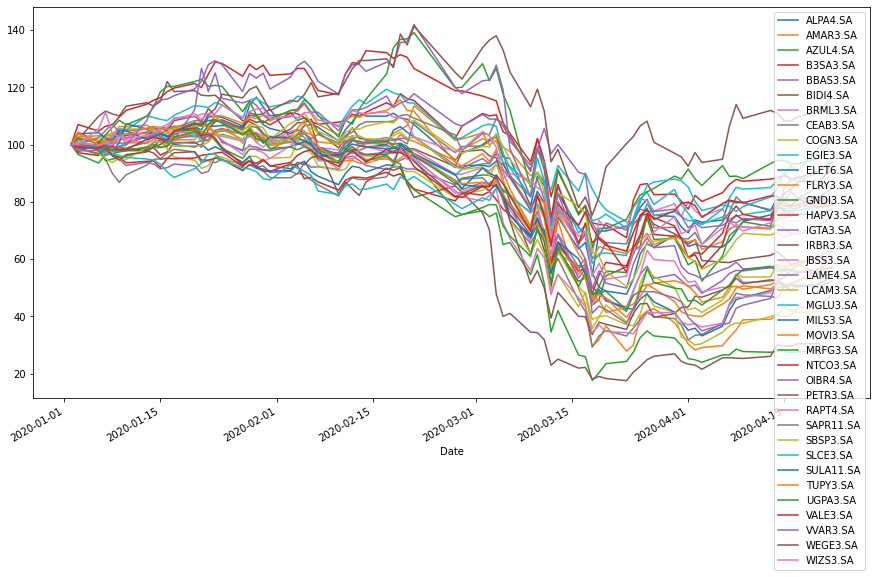

In [59]:
(df_carteira/df_carteira.iloc[0]*100).plot(figsize=(15,8))

In [0]:
#para obeter a fronteira eficiente precisaremos obeter os retornos logaritmos.
log_returns= np.log(df_carteira/df_carteira.shift(1))

In [61]:
log_returns.mean()*250

ALPA4.SA    -0.565009
AMAR3.SA    -2.511569
AZUL4.SA    -4.332309
B3SA3.SA    -0.213260
BBAS3.SA    -2.056874
BIDI4.SA    -1.672057
BRML3.SA    -1.871641
CEAB3.SA    -2.072735
COGN3.SA    -2.959881
EGIE3.SA    -0.800474
ELET6.SA    -0.864531
FLRY3.SA    -0.751364
GNDI3.SA    -0.770517
HAPV3.SA    -0.736036
IGTA3.SA    -1.522091
IRBR3.SA    -4.273212
JBSS3.SA    -0.747659
LAME4.SA    -0.210113
LCAM3.SA    -1.441286
MGLU3.SA     0.097037
MILS3.SA    -2.090872
MOVI3.SA    -1.722823
MRFG3.SA     0.089477
NTCO3.SA    -0.307043
OIBR4.SA    -0.529873
PETR3.SA    -2.190643
RAPT4.SA    -1.749470
SAPR11.SA   -0.357780
SBSP3.SA    -1.104082
SLCE3.SA    -0.158339
SULA11.SA   -2.165734
TUPY3.SA    -1.887264
UGPA3.SA    -1.901190
VALE3.SA    -0.797989
VVAR3.SA    -1.556316
WEGE3.SA     0.519412
WIZS3.SA    -0.983915
dtype: float64

In [62]:
log_returns.cov()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
ALPA4.SA,0.004210,0.004640,0.005677,0.002232,0.002306,0.003526,0.002831,0.004034,0.003246,0.001045,0.002373,0.002126,0.003263,0.003008,0.002837,0.002833,0.002947,0.002686,0.004096,0.003542,0.003120,0.003530,0.003751,0.002831,0.001805,0.003868,0.003788,0.000879,0.002255,0.001114,0.001238,0.001846,0.003017,0.002025,0.004367,0.002522,0.002535
AMAR3.SA,0.004640,0.010726,0.009202,0.003595,0.004407,0.005070,0.004529,0.006745,0.005566,0.001826,0.004457,0.002999,0.004694,0.004283,0.004255,0.004567,0.003516,0.004400,0.007576,0.005456,0.004906,0.006469,0.005043,0.005612,0.003213,0.005089,0.005459,0.000750,0.004182,0.002291,0.001044,0.002770,0.005325,0.003008,0.007853,0.003476,0.003532
AZUL4.SA,0.005677,0.009202,0.011812,0.004524,0.004902,0.006618,0.005338,0.007303,0.006292,0.002131,0.004997,0.003844,0.005911,0.005242,0.005261,0.005690,0.004776,0.005420,0.007670,0.006781,0.005089,0.006317,0.006464,0.006041,0.003258,0.006416,0.006114,0.001132,0.004207,0.002381,0.001671,0.003333,0.006306,0.003956,0.008130,0.004836,0.004790
B3SA3.SA,0.002232,0.003595,0.004524,0.002694,0.002538,0.002845,0.002301,0.002833,0.002673,0.001155,0.002483,0.001694,0.002526,0.002251,0.002508,0.002325,0.002302,0.002511,0.003103,0.003174,0.002183,0.002957,0.002853,0.003066,0.001393,0.003301,0.002558,0.000764,0.001956,0.001277,0.001033,0.001499,0.003139,0.002308,0.003654,0.002078,0.002076
BBAS3.SA,0.002306,0.004407,0.004902,0.002538,0.003223,0.003062,0.002783,0.003259,0.003159,0.001354,0.002807,0.001888,0.002923,0.002583,0.002715,0.002980,0.002286,0.002726,0.003632,0.003398,0.002538,0.003271,0.003016,0.003400,0.001592,0.003444,0.002836,0.000575,0.002525,0.001300,0.000800,0.001720,0.003471,0.002501,0.003958,0.001865,0.002505
BIDI4.SA,0.003526,0.005070,0.006618,0.002845,0.003062,0.005787,0.003167,0.004012,0.003963,0.001527,0.003271,0.002283,0.003876,0.003478,0.002998,0.003621,0.003197,0.003589,0.004483,0.004182,0.003170,0.003656,0.004504,0.003352,0.002056,0.004593,0.003853,0.000990,0.002643,0.001633,0.001566,0.002205,0.004159,0.003057,0.004902,0.003058,0.002887
BRML3.SA,0.002831,0.004529,0.005338,0.002301,0.002783,0.003167,0.003711,0.003691,0.003425,0.001339,0.002518,0.002097,0.003115,0.002795,0.003109,0.002765,0.002400,0.002714,0.004054,0.003438,0.002678,0.003408,0.003028,0.003097,0.001412,0.003250,0.003195,0.000657,0.002553,0.001376,0.000902,0.001768,0.003231,0.001991,0.004387,0.002184,0.002846
CEAB3.SA,0.004034,0.006745,0.007303,0.002833,0.003259,0.004012,0.003691,0.006209,0.004320,0.001337,0.003201,0.002598,0.004033,0.003704,0.003460,0.003554,0.002640,0.003661,0.005408,0.004408,0.004093,0.004620,0.003972,0.004129,0.002480,0.004242,0.004559,0.000802,0.003115,0.001474,0.000937,0.002419,0.004157,0.002280,0.006078,0.003236,0.003213
COGN3.SA,0.003246,0.005566,0.006292,0.002673,0.003159,0.003963,0.003425,0.004320,0.005485,0.001747,0.003182,0.002396,0.003651,0.003354,0.003394,0.003605,0.002881,0.003468,0.004846,0.004125,0.003532,0.004124,0.003846,0.003988,0.002034,0.003761,0.004049,0.000839,0.002939,0.001799,0.001129,0.002230,0.004188,0.002565,0.004990,0.002716,0.002702
EGIE3.SA,0.001045,0.001826,0.002131,0.001155,0.001354,0.001527,0.001339,0.001337,0.001747,0.001016,0.001354,0.000915,0.001293,0.001118,0.001244,0.000904,0.001234,0.001392,0.001539,0.001580,0.001149,0.001563,0.001602,0.001463,0.000728,0.001520,0.001438,0.000443,0.001262,0.000836,0.000593,0.000842,0.001840,0.001326,0.001857,0.000910,0.001007


In [63]:
log_returns.corr()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
ALPA4.SA,1.000000,0.690424,0.805037,0.662754,0.626074,0.714397,0.716076,0.789030,0.675555,0.505341,0.627636,0.752865,0.770191,0.787974,0.751672,0.485600,0.753675,0.684349,0.780679,0.769217,0.732060,0.766403,0.775430,0.620996,0.550861,0.776920,0.826486,0.691827,0.644081,0.448129,0.767227,0.605059,0.654016,0.567921,0.734922,0.685197,0.638007
AMAR3.SA,0.690424,1.000000,0.817504,0.668825,0.749521,0.643445,0.717877,0.826441,0.725672,0.553173,0.738501,0.665352,0.694295,0.702814,0.706231,0.490409,0.563244,0.702365,0.904607,0.742362,0.721365,0.879990,0.653184,0.771223,0.614212,0.640370,0.746108,0.692388,0.748447,0.577660,0.758540,0.568732,0.723150,0.528566,0.828073,0.591653,0.556934
AZUL4.SA,0.805037,0.817504,1.000000,0.801969,0.794404,0.800391,0.806198,0.852737,0.781767,0.615182,0.789028,0.812504,0.833132,0.819739,0.832148,0.582188,0.729144,0.824360,0.872787,0.879200,0.712969,0.818747,0.797789,0.791112,0.593503,0.769411,0.796275,0.660628,0.717367,0.572091,0.768015,0.652072,0.816091,0.662578,0.816886,0.784377,0.719786
B3SA3.SA,0.662754,0.668825,0.801969,1.000000,0.861428,0.720568,0.727710,0.692556,0.695487,0.698186,0.820989,0.749562,0.745436,0.737178,0.830750,0.498149,0.735724,0.799801,0.739321,0.861587,0.640307,0.802558,0.737292,0.840608,0.531515,0.828933,0.697526,0.668235,0.698421,0.642552,0.710891,0.614198,0.850544,0.809369,0.768732,0.705587,0.653342
BBAS3.SA,0.626074,0.749521,0.794404,0.861428,1.000000,0.709104,0.804650,0.728439,0.751247,0.748032,0.848581,0.764110,0.788672,0.773198,0.821935,0.583783,0.668030,0.793794,0.791078,0.843514,0.680602,0.811682,0.712557,0.852384,0.555209,0.790719,0.707053,0.652196,0.824287,0.598089,0.713967,0.644259,0.859956,0.801951,0.761422,0.579215,0.720773
BIDI4.SA,0.714397,0.643445,0.800391,0.720568,0.709104,1.000000,0.683315,0.669355,0.703359,0.629824,0.737729,0.689498,0.780544,0.776962,0.677537,0.529290,0.697344,0.779973,0.728842,0.774638,0.634481,0.677110,0.794108,0.627161,0.535251,0.786895,0.716857,0.615427,0.643838,0.560575,0.766435,0.616306,0.768936,0.731337,0.703674,0.708541,0.619883
BRML3.SA,0.716076,0.717877,0.806198,0.727710,0.804650,0.683315,1.000000,0.768867,0.759201,0.689440,0.709373,0.790981,0.783277,0.779829,0.877187,0.504797,0.653603,0.736345,0.822967,0.795178,0.669264,0.788095,0.666663,0.723610,0.458894,0.695435,0.742512,0.689983,0.776887,0.589758,0.746170,0.616986,0.745956,0.594879,0.786409,0.632101,0.762953
CEAB3.SA,0.789030,0.826441,0.852737,0.692556,0.728439,0.669355,0.768867,1.000000,0.740327,0.532480,0.697120,0.757351,0.784019,0.798883,0.754713,0.501601,0.555931,0.768141,0.848813,0.788355,0.790979,0.825895,0.676079,0.745727,0.623237,0.701595,0.818918,0.727265,0.732806,0.488456,0.668934,0.652746,0.742053,0.526721,0.842287,0.723945,0.665849
COGN3.SA,0.675555,0.725672,0.781767,0.695487,0.751247,0.703359,0.759201,0.740327,1.000000,0.739908,0.737283,0.743151,0.755179,0.769743,0.787707,0.541389,0.645514,0.774218,0.809309,0.784937,0.726210,0.784531,0.696608,0.766356,0.543835,0.661828,0.773907,0.693604,0.735591,0.634430,0.734404,0.640270,0.795355,0.630322,0.735865,0.646590,0.595825
EGIE3.SA,0.505341,0.553173,0.615182,0.698186,0.748032,0.629824,0.689440,0.532480,0.739908,1.000000,0.728835,0.659400,0.621571,0.595973,0.670726,0.315314,0.642092,0.721943,0.597106,0.698328,0.548920,0.690779,0.674240,0.653198,0.452049,0.621563,0.638667,0.675181,0.733764,0.684437,0.711040,0.561760,0.812086,0.757336,0.636306,0.503509,0.515978


In [64]:
#definir uma variável que cinta o número de aticos que compoem a carteira 
num_carteira = len(carteira)
num_carteira

37

In [65]:
#Definir dois pessos aleartórios
arr= np.random.random(3)
arr

array([0.06975694, 0.86072816, 0.83791738])

In [66]:
arr[0]+arr[1]+arr[2]

1.7684024876535012

In [67]:
#definir que a soma dos pessos aleatórops somem 1
weights = np.random.random(num_carteira)
weights /= np.sum(weights) #soma das matrizes divididas pelos seus respectivos pesos
weights

array([0.02567491, 0.03581972, 0.03958814, 0.03730079, 0.02679735,
       0.00845657, 0.02268053, 0.04764057, 0.0270576 , 0.03094203,
       0.02444607, 0.02727457, 0.01279776, 0.02614204, 0.02873067,
       0.01990022, 0.02191456, 0.02081022, 0.00485395, 0.03098111,
       0.01317272, 0.04152969, 0.04653271, 0.01128313, 0.02889632,
       0.02645768, 0.0154938 , 0.04615014, 0.01547584, 0.00556499,
       0.0230602 , 0.03581727, 0.01259204, 0.04475205, 0.05189225,
       0.05119221, 0.01032758])

In [68]:
weights[0]+weights[1]+weights[2]

0.10108277384570835

###Retorno esperado de um portifólio
Soma da média dos retornos logarítmico anualizados ponderados pelo seus pesos.

In [69]:
np.sum(weights*log_returns.mean())*250

-1.2982588821895504

In [70]:
#Variancia
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.7427435572539344

In [71]:
#Volatilidade
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.861825711645884

In [72]:
#Criar um gráfico onde 1000 simulac'ões de média varoância serão plotadas (1000 combinacoes dos mesmos ativos)

pfolio_returns = []
pfolio_volatilities = []

for x in range(2000):
  weights = np.random.random(num_carteira)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns, pfolio_volatilities

([-1.4231913671956797,
  -1.3899164409411668,
  -1.4315560900100286,
  -1.4167378693327128,
  -1.4392970546194497,
  -1.40698203018377,
  -1.3715230887356291,
  -1.1681043414410892,
  -1.3362327860424994,
  -1.2720342188772729,
  -1.2442908826803492,
  -1.4689066302931848,
  -1.4188223070135422,
  -1.3259432490858651,
  -1.1781238910072398,
  -1.249612367011705,
  -1.2862507740182554,
  -1.497980283341188,
  -1.3514287023654352,
  -1.1207099745094034,
  -1.320072468649235,
  -1.2109619331694332,
  -1.3326971930319687,
  -1.1529467285440052,
  -1.4316393340735376,
  -1.2895424258375572,
  -1.357081460077249,
  -1.3502950065043595,
  -1.413963548147655,
  -1.5284010551912062,
  -1.4774219398814195,
  -1.2529202468650331,
  -1.232843726124285,
  -1.2662879121844788,
  -1.368277080925781,
  -1.1611423939271324,
  -1.3634555091872411,
  -1.30867107835788,
  -1.1890276249085654,
  -1.3530113174088518,
  -1.1962333344171951,
  -1.498896191781582,
  -1.2479485940588364,
  -1.2566794053293613,


In [73]:
#converter essas listas em array
pfolio_returns = []
pfolio_volatilities = []

for x in range(10000):
  weights = np.random.random(num_carteira)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([-1.42919071, -1.28828338, -1.32724165, ..., -1.34907519,
        -1.21844914, -1.28548298]),
 array([0.89699513, 0.81976631, 0.8683298 , ..., 0.83337162, 0.86143755,
        0.86549686]))

In [74]:
#Criar um data frame com duas colunas uma com os retornos e outra com as volatilidades
portifolio = pd.DataFrame({"Return": pfolio_returns, "Volatility": pfolio_volatilities})
portifolio.head()

,Return,Volatility
0,-1.429191,0.896995
1,-1.288283,0.819766
2,-1.327242,0.868330
3,-1.032719,0.795653
4,-1.172174,0.835979


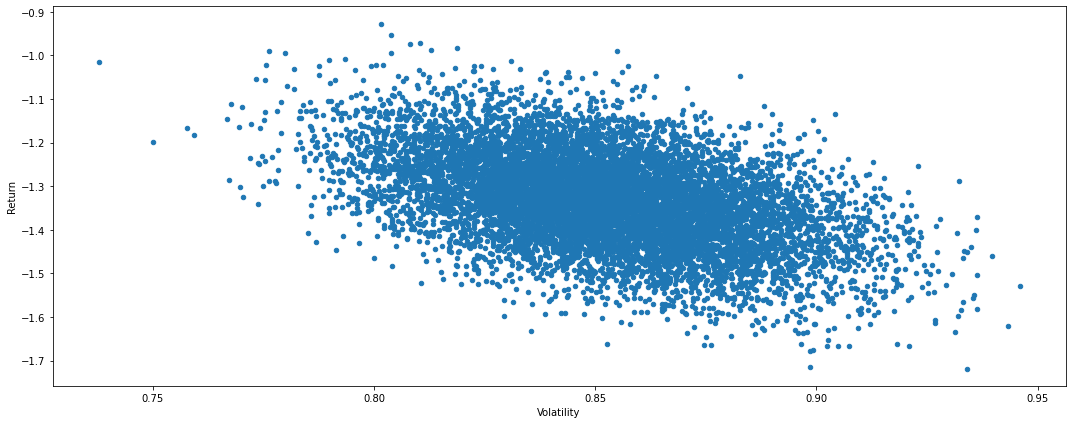

In [75]:
portifolio.plot(x="Volatility", y= "Return", kind= "scatter", figsize=(15,6))
plt.tight_layout();

#Medindo o Beta
Pode ser calculado como a variancia emtre a ação e o mercado dividido pela variância DO MERCADO.


In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
carteira_beta = ["PETR4.SA", "BOVA11.SA"]
df_carteira_beta = pd.DataFrame()
for acoes in carteira_beta:
  df_carteira_beta[acoes] = wb.DataReader(acoes, data_source = "yahoo", start = "2015-1-1")["Adj Close"]

In [77]:
df_carteira_beta.head()

,PETR4.SA,BOVA11.SA
Date,,
2015-01-02,8.683939,47.259998
2015-01-05,7.941722,46.320000
2015-01-06,7.681945,46.580002
2015-01-07,8.043777,48.150002
2015-01-08,8.563329,48.509998


In [78]:
#Beta mostra ate que ponto a variacao de um um ativo esta relacionado com a variacao geral do mercado.
sec_returns = np.log(df_carteira_beta/df_carteira_beta.shift(1))


cov = sec_returns.cov()*250
cov

,PETR4.SA,BOVA11.SA
PETR4.SA,0.307542,0.120573
BOVA11.SA,0.120573,0.076141


In [79]:
#numerador da formula do beta em forma float
cov_with_market = cov.iloc[0,1]
cov_with_market

0.12057292727925814

In [80]:
#denominador - variancia do mercado anualizada
market_var = sec_returns["BOVA11.SA"].var()*250
market_var

0.07614090467348768

In [81]:
# entao o beta é a variancia enmtre a acao e o mercado (covariancia) dividida pela variancia do mercado.
#escolher bem os periodos antes de realizar o calculo do beta. Exemplo quando ha fortes mudancas de marcado como o caso do covid 19.

# é possivel consulytar o beta de uma acoa atraves do google finance
Petr4_beta = cov_with_market/market_var
Petr4_beta

1.583549969576888